# Wie können wir manuell einen Entscheidungsbaum entwickeln?

Wir haben zwei **Klassen** von Insekten: 
- ```Marienkäfer```
- ```Raupe```

<td> 
    <img src="Bilder\marienkaefer.jpg" alt="Drawing" style="width: 100px; float: left;"  hspace=40 /> 
    <img src="Bilder\raupe.jpg" alt="Drawing" style="width: 100px; float: left;" hspace=40/>
</td>

## Zielsetzung: bisher Unbekanntes auf Grundlage der Trainingsdaten richtig klassifizieren

Das Ziel ist es ein (bisher unbekanntes) Insekt, d. h. entweder ein Marienkäfer oder eine Raupe, nur aufgrund der Informationen über seine ```Breite``` und ```Länge"``` richtig zu klassifizieren.

 - Wir möchten auf Grundlage unserer Trainingsdaten die **meisten** bisher unbekannten Insekten **richtig klassifizieren**.
 - Wir möchten auf Grundlage unserer Trainingsdaten die **wenigsten** bisher unbekannten Insekten **falsch klassifizieren**.
 - Diese Klassfizierung gelingt u. a. mit einem Entscheidungsbaum.

**Leitfragen:**
* Was muss man beachten, wenn man einen "guten" Entscheidungsbaum manuell erstellt?
* Nach welchen Kriterien erstellt man einen "guten" Entscheidungsbaum?


## Zielvariable vs. Prädiktorvariable
Es wird zwischen folgenden zwei Arten von Variablen unterschieden:
    
* ```Prädiktorvariable```
* ```Zielvariable```

In unserem Beispiel ist die ```Zielvarible``` das ```Insekt```.
(Für ein Insekt gibt es in unserem Beispiel die zwei Klassen ```Marienkäfer``` und ```Raupe```.

In unserem Beispiel gibt es die zwei ```Prädiktorvariblen``` ```Breite``` und ```Länge```.

In [1]:
# Dieser Quelltext ist nicht prüfungsrelevant.

# Bibliotheken importieren
import pandas as pd
from PyTree import ClassificationTree as ct
from ipywidgets import interactive
from plotly.offline import iplot
import plotly as py
import cufflinks as cf
cf.go_offline()

## Trainingsdaten vs. Testdaten
Das Modell wird nur mit den ```Trainingsdaten``` trainiert. Der Entscheidungsbaum wird nur auf Grundlage der Trainingsdaten erstellt.

* Hinweis: Wir behandeln hier zunächst die ```Trainingsdaten``` und werden später auf die ```Testdaten``` zurückkommen.

Mit den ```Testdaten``` wird die Qualität des Modells überprüft.
Das erstellte Modell soll möglichst gut die bisher unbekannten ```Testdaten``` klassifizieren.


# Entscheidungsbaum manuell erstellen: interaktiv mit nur einer Prädiktorvariablen

In [2]:
# Trainingsdaten einlesen -> "data frame df_käfer_trainingsdaten"
df_käfer_trainingsdaten = pd.read_csv('Käfer.csv', sep=';')

# zeige den Anfang des Datensatzes "df_käfer_trainingsdaten" an
print("Trainingsdaten")
display(df_käfer_trainingsdaten)

Trainingsdaten


,Breite,Länge,Insekt
0,0.48,0.38,Marienkäfer
1,0.32,0.74,Raupe
2,0.49,0.27,Marienkäfer
3,0.58,0.46,Marienkäfer
4,0.11,0.58,Raupe
...,...,...,...
195,0.57,0.37,Marienkäfer
196,0.10,0.54,Raupe
197,0.39,0.81,Raupe
198,0.56,0.29,Marienkäfer


<div style="background-color: lightblue; padding: 5px 20px 20px">
    
## *Aufgabe: Führe den folgenden Quelltext aus und stelle mit dem Schwieberegler den Schwellenwert jeweils wie folgt ein:*
     - Hinweis: Klicke nach dem Einstellen des Schwiereglers auf den Button "Erstelle Split".
    
a) Finde für das Attribut ```Länge``` einen Schwellenwert, so dass im Knoten mit der ```Nr. 2 keine falsch klassifizierten Raupen``` erkannt werden.
    
b) Finde für das Attribut ```Länge``` einen Schwellenwert, so dass im Knoten mit der ```Nr. 3 keine falsch klassifizierten Marienkäfer``` erkannt werden.
    
c) Finde für das Attribut ```Breite``` einen Schwellenwert, so dass im Knoten mit der ```Nr. 2 keine falsch klassifizierten Marienkäfer``` erkannt werden.
    
d) Finde für das Attribut ```Breite``` einen Schwellenwert, so dass im Knoten mit der ```Nr. 3 keine falsch klassifizierten Raupen``` erkannt werden.
    
e) Finde den Datensplit (```Attribut``` auswählen und ```Schwellenwert``` einstellen), so dass **in Summe** am wenigsten ```Insekten (Marienkäfer und Raupen) falsch klassifiziert``` werden.

In [3]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

# Entscheidungsbaum mit einer Entscheidungsregel erstellen 

# threshold bedeutet Schwellenwert
def split(Attribut, Schwellenwert):
    tree.manual_split(attribute = Attribut,  threshold = Schwellenwert, node_nr = 1)                    
    display(tree.print_tree())                    
    
tree_widget = interactive(split,{'manual': True, 'manual_name': 'Erstelle Split'}, 
                          Attribut = ['Länge', 'Breite'], Schwellenwert = (0.0,1.0,0.01)) 

display(tree_widget)

interactive(children=(Dropdown(description='Attribut', options=('Länge', 'Breite'), value='Länge'), FloatSlide…

# Entscheidungsbaum manuell erstellen: programmiert mit nur einer Prädiktorvariablen

Der Entscheidungsbaum kann auch ohne einen Schieberegler und nur über einen Quelltext erstellt werden.

    - Hinweis: Das Baumobjekt wird hier mit tree2 bezeichnet.

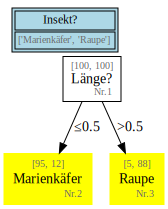

In [4]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree2 = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

# Entscheidungsbaum erstellen 

# threshold bedeutet Schwellenwert
tree2.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1)

#Entscheidungsbaum ausgeben
tree2.print_tree()

<div style="background-color: lightblue; padding: 5px 20px 20px">

## *Aufgabe: Stelle Folgendes ein: ERGÄNZEN*
    - Hinweis: Das Baumobjekt wird hier mit tree3 bezeichnet.    

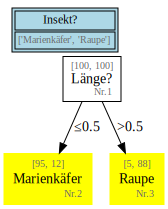

In [5]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree3 = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

# Entscheidungsbaum erstellen 

# threshold bedeutet Schwellenwert
tree3.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1) # hier threshold-Wert anpassen

#Entscheidungsbaum ausgeben
tree3.print_tree()

# Entscheidungsbaum manuell erstellen: programmiert mit mehreren Prädiktorvariablen

Eine noch bessere Klassifizierung kann erreicht werden, wenn alle ```Prädiktorvariablen``` (hier: ```Breite``` und ```Länge```) berücksichtigt werden.

    - Hinweis: Das Baumobjekt wird hier mit tree4 bezeichnet.

In [6]:
# zeige den Anfang des Datensatzes "df_käfer_trainingsdaten" an
print("Trainingsdaten")
display(df_käfer_trainingsdaten)

Trainingsdaten


,Breite,Länge,Insekt
0,0.48,0.38,Marienkäfer
1,0.32,0.74,Raupe
2,0.49,0.27,Marienkäfer
3,0.58,0.46,Marienkäfer
4,0.11,0.58,Raupe
...,...,...,...
195,0.57,0.37,Marienkäfer
196,0.10,0.54,Raupe
197,0.39,0.81,Raupe
198,0.56,0.29,Marienkäfer


In [7]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree4 = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

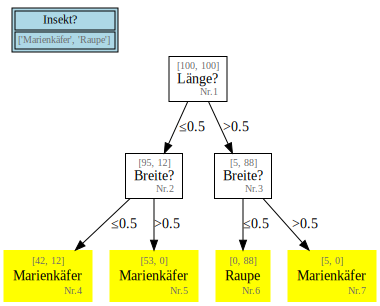

In [8]:
# Entscheidungsbaum erstellen 

# threshold bedeutet Schwellenwert
tree4.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1) # hier threshold anpassen
tree4.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 2) # hier threshold anpassen
tree4.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 3) # hier threshold anpassen

#Entscheidungsbaum ausgeben
tree4.print_tree()

<div style="background-color: lightblue; padding: 5px 20px 20px">

## *Aufgabe: Erläutere, wie viele Insekte im obigen Beispiel mit den Schwellenwerten von jeweils 0.5 falsch klassifiziert werden.*
    
    Tipp: Die Zahlen in den eckigen Klammern (hier: z. B. [42,12]) sind von Bedeutung.

<div style="background-color: lightblue; padding: 5px 20px 20px">

## *Aufgabe: Verändere im nachfolgenden Quelltext die Schwellenwerte (thresholds) so, dass die Anzahl der Fehlklassifikationen minimal wird. Notiere die beste Wahl der gefundenen Schwellenwerte.*
    Hinweis: Das Baumobjekt wird hier mit tree5 bezeichnet.

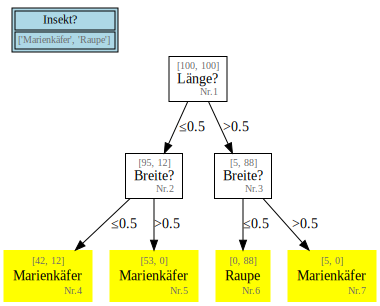

In [9]:
# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree5 = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

# threshold bedeutet Schwellenwert
tree5.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1) # hier threshold anpassen
tree5.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 2) # hier threshold anpassen
tree5.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 3) # hier threshold anpassen

#Entscheidungsbaum ausgeben
tree5.print_tree()

<div style="background-color: lightblue; padding: 5px 20px 20px">

## *Vertiefungsaufgabe: Verändere im nachfolgenden Quelltext die Schwellenwerte (thresholds) so, dass die Anzahl der Fehlklassifikationen minimal wird.*
    Hinweise: 
    - Du sollst mit den zwei Datensplits auskommen und keinen weiteren Datensplit einfügen.
    - Das Baumobjekt wird hier mit tree6 bezeichnet.    

Trainingsdaten


,Breite,Länge,Insekt
0,0.48,0.38,Marienkäfer
1,0.32,0.74,Raupe
2,0.49,0.27,Marienkäfer
3,0.58,0.46,Marienkäfer
4,0.11,0.58,Raupe
...,...,...,...
195,0.57,0.37,Marienkäfer
196,0.10,0.54,Raupe
197,0.39,0.81,Raupe
198,0.56,0.29,Marienkäfer


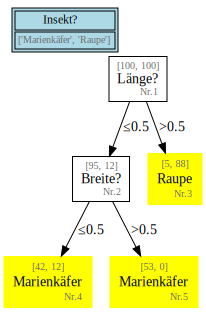

In [10]:
# Trainingsdaten einlesen -> "data frame df_käfer_trainingsdaten"
df_käfer_trainingsdaten = pd.read_csv('Käfer.csv', sep=';')

# zeige den Anfang des Datensatzes "df_käfer_trainingsdaten" an
print("Trainingsdaten")
display(df_käfer_trainingsdaten)

# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree6 = ct.DecisionTree(target = 'Insekt', data = df_käfer_trainingsdaten)

# threshold bedeutet Schwellenwert
tree6.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1) # hier threshold anpassen
tree6.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 2) # hier threshold anpassen

#Entscheidungsbaum ausgeben
tree6.print_tree()

# KäferAlternativ Datensatz zur weiteren Übung


<div style="background-color: lightblue; padding: 5px 20px 20px">

## *Aufgabe: Erstelle im Folgenden einen optimierten Entscheidungsbaum für den Datensatz **[KäferAlternativ.csv](KäferAlternativ.csv)**.*
    Hinweis: Das Baumobjekt wird hier mit tree7 bezeichnet.

Trainingsdaten KäferAlternativ


,Breite,Länge,Insekt
0,0.42,0.29,Marienkäfer
1,0.39,0.92,Raupe
2,0.39,0.32,Marienkäfer
3,0.53,0.44,Marienkäfer
4,0.68,0.53,Marienkäfer
...,...,...,...
195,0.51,0.35,Marienkäfer
196,0.19,0.70,Raupe
197,0.57,0.29,Marienkäfer
198,0.16,0.60,Raupe


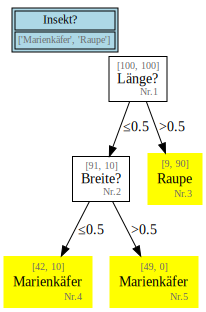

In [11]:
# Trainingsdaten einlesen -> "data frame df_käferAlternativ_trainingsdaten"
df_käferAlternativ_trainingsdaten = pd.read_csv('KäferAlternativ.csv', sep=';')

# zeige den Anfang des Datensatzes "df_käferAlternativ_trainingsdaten" an
print("Trainingsdaten KäferAlternativ")
display(df_käferAlternativ_trainingsdaten)

# Entscheidungsbaum initialisieren mit Zielvariable (hier in Spalte "Insekt") und Trainingsdaten
tree7 = ct.DecisionTree(target = 'Insekt', data = df_käferAlternativ_trainingsdaten)

# threshold bedeutet Schwellenwert
tree7.manual_split(attribute = 'Länge',  threshold = 0.5, node_nr = 1) # hier threshold anpassen
tree7.manual_split(attribute = 'Breite', threshold = 0.5, node_nr = 2) # hier threshold anpassen

#Entscheidungsbaum ausgeben
tree7.print_tree()


<div style="background-color: lightblue; padding: 5px 20px 20px">

## *Vertiefungsaufgabe: Erläutere die Strategie, mit der Du Deine Schwellenwerte bestimmt hast.*


Bitte trage Deine Erläuterung in diese Zelle ein. (Doppelklick auf diese Zelle).


_ _ 


<div style="background-color: lightblue; padding: 5px 20px 20px">
    
**Aufgabe 5**
    
1000 Pralinen, die in zwei Güteklassen unterteilt sind, wurden gemessen.

    Die Zielvariable ist die Kategorie.
    Als Prädiktorvariablen stehen der Durchmesser, das Gewicht und die Farbe zur Verfügung.
    
    Tipp:
        # sortiere die Datensätze nach einer Spalte (aufsteigend) mit Ausgabe
        df_käfer.sort_values(by='Insekt')
    
5.1. *Erläutere den Aufbau des Datensatzes: **[Pralinen.csv](Pralinen.csv)**.*
    
5.2. *Erstelle im Folgenden einen optimierten Entscheidungsbaum für den Datensatz **[Pralinen.csv](Pralinen.csv)**.*
    
5.3. *Erläutere nach welchen Kriterien Pralinen in die zwei Güteklassen einsortiert werden.*
    


In [ ]:
# ab hier kann programmiert werden

